# SPAM MESSAGE FILTER

### Using Multinomial Naïve Bayes Classifier, A supervised Machine Learning Algorithm.

In [1]:
# import pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 

In [2]:
# import Data
msg_df= pd.read_csv("C:/Users/shrad/OneDrive/Desktop/Messages.csv", encoding="latin-1")

In [3]:
msg_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Basic Info Of Messages DataSet

In [4]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
msg_df.size

27860

### Data Processing and Cleaning

In [6]:
#checking null values
msg_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#checking duplicate values
msg_df.duplicated().sum()

403

In [8]:
# Dropping Unwanted Columns
msg_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# Deleting Duplicate Data
msg_df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
#checking duplicate values
msg_df.duplicated().sum()

0

In [12]:
msg_df.size

10338

In [13]:
msg_df.rename(columns = {'v1' : 'Target', 'v2':'Message'}, inplace = True)

In [14]:
msg_df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
#Turning Spam and Ham Data into Numerical data, creating new column Status:Spam
#0 Indicates Absence and 1 Indicates presence of spam message
msg_df['StatusSpam']=msg_df['Target'].apply(lambda x: 1 if x=='spam' else 0)

In [16]:
msg_df

,Target,Message,StatusSpam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


### Visualisation of Data

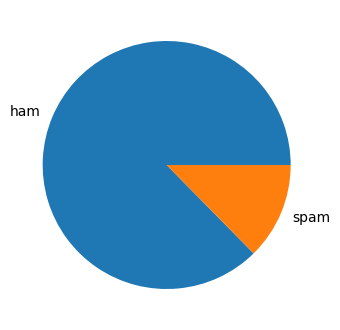

In [17]:
plt.figure(figsize=(4,6))
plt.pie(msg_df['Target'].value_counts(), labels = ['ham', 'spam'])
plt.show()

### Creating Test and Train Splits

In [18]:
x_train,x_test,y_train,y_test=train_test_split(msg_df.Message,msg_df.StatusSpam)

In [19]:
x_train.describe()

count                                                  3876
unique                                                 3876
top       Congrats! 1 year special cinema pass for 2 is ...
freq                                                      1
Name: Message, dtype: object

### Creating Matrix

In [20]:
#finding word count and store data as matrix
cv=CountVectorizer()
x_train_count =cv.fit_transform(x_train.values)

In [21]:
x_train_count

<3876x7299 sparse matrix of type '<class 'numpy.int64'>'
	with 50861 stored elements in Compressed Sparse Row format>

In [22]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Training Model

In [23]:
model= MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

### Testing Model

In [24]:
msg1=["hello,how are you!!"]
msg1_count= cv.transform(msg1)
model.predict(msg1_count)

array([0], dtype=int64)

In [25]:
msg2=["good night, Take care"]
msg2_count= cv.transform(msg2)
model.predict(msg2_count)

array([0], dtype=int64)

In [26]:
msg3=["reward money, click here!"]
msg3_count= cv.transform(msg3)
model.predict(msg3_count)

array([1], dtype=int64)

In [27]:
x_test_count= cv.transform(x_test)
model.score(x_test_count, y_test)

0.9783449342614076